Here I will use Pandas for Section 2 and 3

### Part 2

In [7]:
import pandas as pd
import numpy as np
class Data:
    def __init__(self, filename):
        self.data = pd.read_csv(filename)
        
    def keepColumn(self, *args):
        keep_col = []
        for i in args:
            keep_col.append(i)
        self.data = self.data[keep_col]
    
    def toCSV(self, fileName):
        self.data.to_csv(fileName, index=False)
        
    def dropNA(self, *args):
        subset = []
        for i in args:
            subset.append(i)
        self.data = self.data.dropna(subset = subset)
        
    def fillNA(self, column, value):
        self.data = self.data[column].fillna(value)
        
    def count(self, column):
        print(self.data[column].value_counts())
    
    def plot(self, column, form):
        return self.data[column].value_counts().plot(kind = form)

Extra Credit: use class

In [8]:
file = Data("Consumer_Services_Mediated_Complaints.csv")
file.data[:5]

,Business Name,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Restitution,Business Building,Business Street,Building Address Unit,Business City,Business State,Business Zip,Complainant Zip,Longitude,Latitude
0,MUNDO TRAVEL,Travel Agency - 440,Non-Delivery of Goods - N01,10/11/2017,11/03/2017,Resolved and Consumer Satisfied - SPF,Yes,0.0,127,GRAHAM AVE,NaN,BROOKLYN,NY,11206.0,11101,-73.943142,40.707031
1,DREAM WORLD FURNITURE CORP.,Furniture Sales - 242,Non-Delivery of Goods - N01,01/06/2017,01/20/2017,Goods Received - GDR,Yes,0.0,2997,3RD AVE,NaN,BRONX,NY,10455.0,10475,NaN,NaN
2,MANSION 88 PARKING LLC,Garage - 049,Damaged Goods - D01,09/13/2017,09/29/2017,Cash Amount - AMT,Yes,1412.0,170,E END AVE,NaN,NEW YORK,NY,10128.0,11580,-73.943978,40.776034
3,MAX WORLD OF CARS II INC,Secondhand Dealer Auto - 005,Damaged Goods - D01,01/12/2018,01/30/2018,Goods Repaired - GRS,Yes,0.0,332,NaN,NaN,WYCLOFF,NJ,7481.0,11385,-73.905655,40.753434
4,E Z PAWN CORP.,Jewelry Store-Retail - 823,Non-Delivery of Goods - N01,01/10/2017,01/31/2017,Resolved and Consumer Satisfied - SPF,Yes,0.0,1878,LEXINGTON AVE,NaN,NEW YORK,NY,10035.0,11412,-73.941210,40.799201


In [9]:
file.keepColumn('Industry','Complaint Type','Mediation Start Date','Mediation Close Date','Complaint Result','Satisfaction','Business City','Business State')
file.dropNA('Business City', 'Business State','Complaint Type')
#file.toCSV("newFile1.csv")

In [10]:
file.data[:5]

,Industry,Complaint Type,Mediation Start Date,Mediation Close Date,Complaint Result,Satisfaction,Business City,Business State
0,Travel Agency - 440,Non-Delivery of Goods - N01,10/11/2017,11/03/2017,Resolved and Consumer Satisfied - SPF,Yes,BROOKLYN,NY
1,Furniture Sales - 242,Non-Delivery of Goods - N01,01/06/2017,01/20/2017,Goods Received - GDR,Yes,BRONX,NY
2,Garage - 049,Damaged Goods - D01,09/13/2017,09/29/2017,Cash Amount - AMT,Yes,NEW YORK,NY
3,Secondhand Dealer Auto - 005,Damaged Goods - D01,01/12/2018,01/30/2018,Goods Repaired - GRS,Yes,WYCLOFF,NJ
4,Jewelry Store-Retail - 823,Non-Delivery of Goods - N01,01/10/2017,01/31/2017,Resolved and Consumer Satisfied - SPF,Yes,NEW YORK,NY


### Part 3

(1) Which industry receives the most complaint?

In [11]:
file.count("Industry")

Home Improvement Contractor - 100                   708
Tow Truck Company - 124                             506
Misc Non-Food Retail - 817                          497
Electronic Store - 001                              401
Furniture Sales - 242                               371
Secondhand Dealer Auto - 005                        323
Debt Collection Agency - 122                        310
Garage - 049                                        182
Appliances - 244                                    106
Dry Cleaners - 230                                   98
Electronic & Home Appliance Service Dealer - 115     73
Mailorder Misc - 319                                 67
Retail Store - 820                                   64
Other                                                63
Employment Agency - 034                              59
Travel Agency - 440                                  57
Restaurant - 818                                     43
Jewelry Store-Retail - 823                      

In [11]:
plt = file.plot("Industry","pie")


So, Home Improvement Contractor - 100 is the industry which received most complaint.

(2)What is the percent of satisfied customer service?

In [15]:
file.count("Satisfaction")

Yes    2301
No     1251
Name: Satisfaction, dtype: int64


In [5]:
file.fillNA("Satisfaction", "Unknown")
file.data[:20]

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
5         Yes
6         Yes
7     Unknown
8         Yes
9          No
10        Yes
11    Unknown
12         No
13    Unknown
14         No
15        Yes
16         No
17         No
18        Yes
19        Yes
Name: Satisfaction, dtype: object

In [34]:
perncet_yes = 2301/4436

In [13]:
print("{0:.2%}".format(perncet_yes))

51.87%


So, the satisfaction rate is 51.87%.

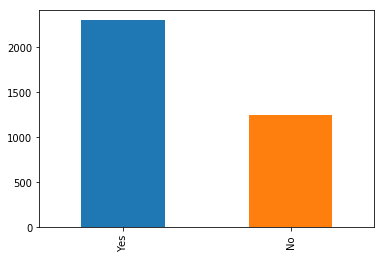

In [17]:
file.plot("Satisfaction", "bar")

(3) What are the first 5 states which receives most complaint?

In [20]:
file.count("Business State")

NY    3726
IL      70
NJ      68
GA      67
TX      62
CT      43
CA      41
VA      38
MN      35
DE      33
FL      31
WA      30
PA      29
OH      22
MA      21
KS      13
AR      13
NC      13
MO      11
WI      10
TN       9
NM       9
SC       5
UT       5
IA       3
AZ       3
AL       3
OR       3
CO       3
KY       3
IN       2
MS       2
OK       2
LA       2
NE       1
MI       1
NH       1
SD       1
RI       1
NV       1
Name: Business State, dtype: int64


So, the first 5 states are NY with 3729 complaints, IL with 70 complaints, NJ with 68 complaints, GA with 67 complaints and TX with 62 complaints

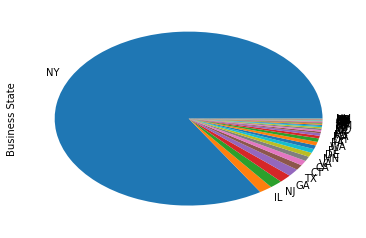

In [14]:
file.plot("Business State", "pie")